# Name - MEDHINI KULKARNI

# THE SPARKS FOUNDATION INTERNSHIP 

# GRIP DECEMBER 2020 

# TASK 5

# Exploratory Data Analysis - Global Terrorism Dataset 

In [92]:
#Importing required libraries
#from warnings import filterwarnings
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Loading and Reading the Data

In [93]:
#Loading the dataset
terrorism_df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1' )
terrorism_df.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                             'provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType',
                             'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                             'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive',
                             'success':'Success'},inplace=True)

In [94]:
terrorism_df.shape

(181691, 135)

In [95]:
#only displaying certain columns that are being used
terrorism_df=terrorism_df[['Event_ID','Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType',
                           'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive', 'Success']]

In [96]:
print("Data read successfully")
terrorism_df.head(10)

Data read successfully


Event_ID  Year  Month  Day             Country       state  \
0  197000000001  1970      7    2  Dominican Republic         NaN   
1  197000000002  1970      0    0              Mexico     Federal   
2  197001000001  1970      1    0         Philippines      Tarlac   
3  197001000002  1970      1    0              Greece      Attica   
4  197001000003  1970      1    0               Japan     Fukouka   
5  197001010002  1970      1    1       United States    Illinois   
6  197001020001  1970      1    2             Uruguay  Montevideo   
7  197001020002  1970      1    2       United States  California   
8  197001020003  1970      1    2       United States   Wisconsin   
9  197001030001  1970      1    3       United States   Wisconsin   

                        Region           city   latitude   longitude  \
0  Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                North America    Mexico city  19.371887  -99.086624   
2               Southeast Asia        Unknown  15.478598  120.599741   
3               Western Europe         Athens  37.997490   23.762728   
4                    East Asia        Fukouka  33.580412  130.396361   
5                North America          Cairo  37.005105  -89.176269   
6                South America     Montevideo -34.891151  -56.187214   
7                North America        Oakland  37.791927 -122.225906   
8                North America        Madison  43.076592  -89.412488   
9                North America        Madison  43.072950  -89.386694   

                       AttackType  Killed  Wounded  \
0                   Assassination     1.0      0.0   
1     Hostage Taking (Kidnapping)     0.0      0.0   
2                   Assassination     1.0      0.0   
3               Bombing/Explosion     NaN      NaN   
4  Facility/Infrastructure Attack     NaN      NaN   
5                   Armed Assault     0.0      0.0   
6                   Assassination     0.0      0.0   
7               Bombing/Explosion     0.0      0.0   
8  Facility/Infrastructure Attack     0.0      0.0   
9  Facility/Infrastructure Attack     0.0      0.0   

                                              Target  \
0                                       Julio Guzman   
1                            Nadine Chaval, daughter   
2                                           Employee   
3                                       U.S. Embassy   
4                                     U.S. Consulate   
5                          Cairo Police Headquarters   
6  Juan Maria de Lucah/Chief of Directorate of in...   
7                                    Edes Substation   
8  R.O.T.C. offices at University of Wisconsin, M...   
9  Selective Service Headquarters in Madison Wisc...   

                                             Summary  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  1/1/1970: Unknown African American assailants ...   
6                                                NaN   
7  1/2/1970: Unknown perpetrators detonated explo...   
8  1/2/1970: Karl Armstrong, a member of the New ...   
9  1/3/1970: Karl Armstrong, a member of the New ...   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   
5                  Black Nationalists                       Police   
6                 Tupamaros (Uruguay)                       Police   
7                             Unknown                    Utilitie

In [97]:
terrorism_df.isnull().sum()

Event_ID            0
Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Success             0
dtype: int64

In [98]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Event_ID     181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

# Printing the main features of the dataset

In [99]:
print("Region with the most attacks:",terrorism_df['Region'].value_counts().idxmax())
print("Country with the most attacks:",terrorism_df['Country'].value_counts().idxmax())
print("City with the most attacks:",terrorism_df['city'].value_counts().index[1]) #as first value is unknown
print("Year with the most attacks:",terrorism_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",terrorism_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",terrorism_df['Group'].value_counts().index[1])
print("Most Attack Types:",terrorism_df['AttackType'].value_counts().idxmax())

Region with the most attacks: Middle East & North Africa
Country with the most attacks: Iraq
City with the most attacks: Baghdad
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# Visualizing Terrorism data across the world (based on regions) through the years 1970-2017 using CrossTab

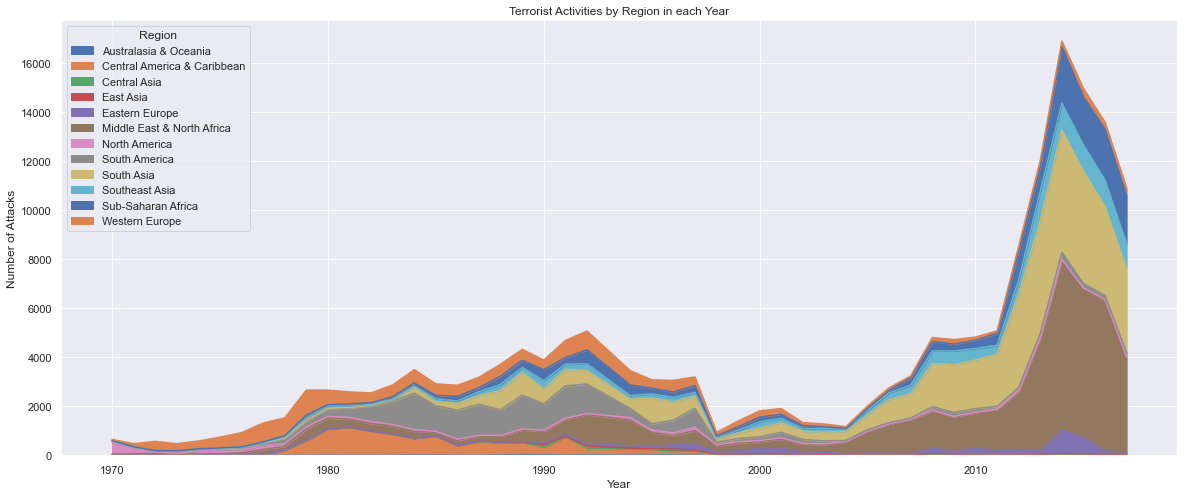

In [100]:
pd.crosstab(terrorism_df.Year, terrorism_df.Region).plot(kind='area',figsize=(20,8))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

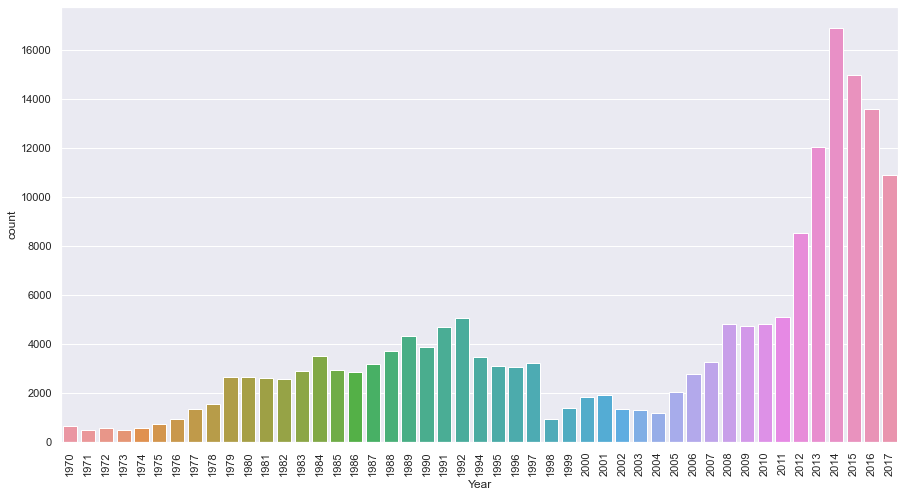

In [101]:
#Year v/s Count Data
plt.figure(figsize=(15,8))
sns.countplot(data = terrorism_df, x = 'Year')
plt.xticks(rotation=90)
plt.show()

# We see from the above two visualizations that the year 2014 had the most terrorism activity

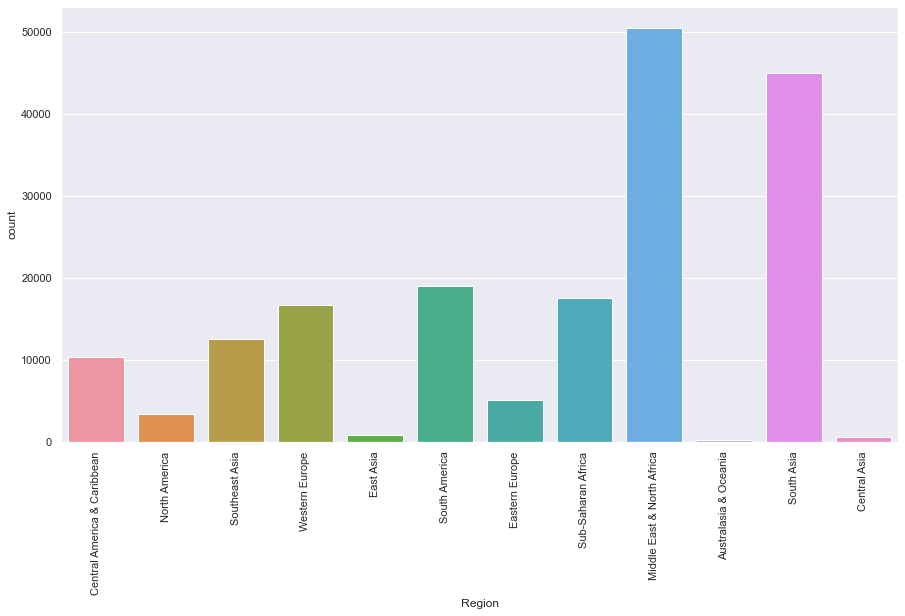

In [102]:
#Region v/s Count Data
sns.set()
plt.figure(figsize=(15,8))
sns.countplot(data = terrorism_df, x = 'Region')
plt.xticks(rotation=90)
plt.show()

# From the above plot and the CrossTab, we see that the Region affected most by terrorit activity is Middle East and North Africa

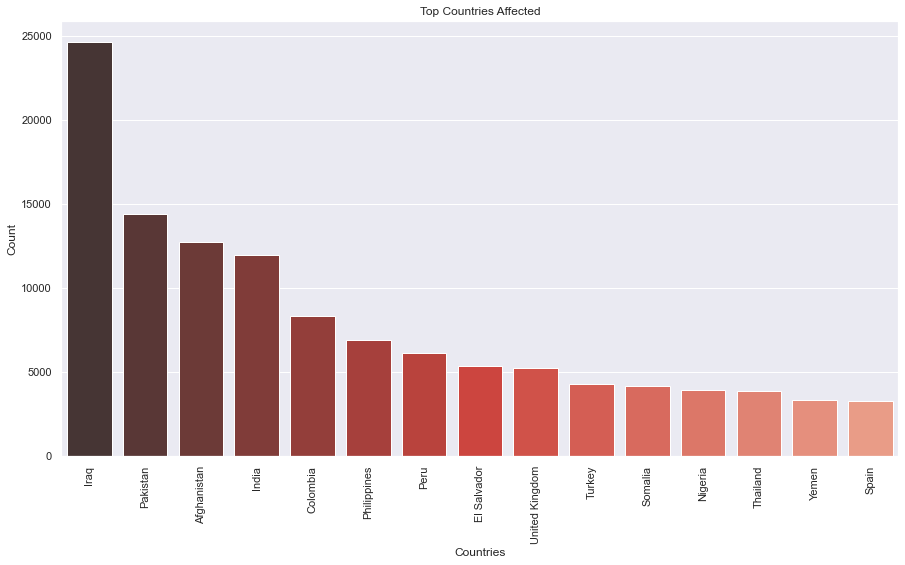

In [103]:
#Plotting Data of the Top 15 countries affected the most
#State (top 15) v/s Count Data
plt.figure(figsize=(15,8))
sns.barplot(terrorism_df['Country'].value_counts()[:15].index,terrorism_df['Country'].value_counts()[:15].values,palette='Reds_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [104]:
terrorism_df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

# From the above data, it is clear that Iraq is the most affected country in the world. 

# We now go to analyse Terrorist activity data in Iraq

In [105]:
#Day with value = 0 is set to 1
#Date is calculated with the year, month and day columns and a new date column is created.

Iraq_Attack = terrorism_df[terrorism_df.Country == 'Iraq']
Iraq_Attack['Day'][Iraq_Attack.Day == 0] = 1
Iraq_Attack['Date'] = pd.to_datetime(Iraq_Attack[['Year','Month','Day']])
Iraq_Attack.drop(['Year','Month','Day'], axis = 1, inplace = True)
Iraq_Attack_Columns = Iraq_Attack.columns.tolist() 
Iraq_Attack_Columns.insert(1, Iraq_Attack_Columns.pop(Iraq_Attack_Columns.index('Date')))
Iraq_Attack = Iraq_Attack.reindex(columns = Iraq_Attack_Columns)

In [106]:
#grouping data with the casualties specifically in Iraq - killed and wounded
#iraq_casualties_df = DataFrame()
iraq_casualties_df= Iraq_Attack.groupby('AttackType')['AttackType'].count().reset_index(name = "Attack")
killed= np.asarray(Iraq_Attack.groupby('AttackType')['Killed'].count())
iraq_casualties_df['Killed'] = (killed/killed.sum()) *100;
wounded= np.asarray(Iraq_Attack.groupby('AttackType')['Wounded'].count())
iraq_casualties_df['Wounded'] = (wounded/wounded.sum())*100;
del iraq_casualties_df['Attack']
iraq_casualties_df #Percentage of killed and injured is calculated and displayed for the attack types

AttackType     Killed    Wounded
0                        Armed Assault  13.002384  12.849807
1                        Assassination   5.378278   5.395807
2                    Bombing/Explosion  75.525909  76.067608
3       Facility/Infrastructure Attack   0.623144   0.594780
4                            Hijacking   0.041822   0.042790
5  Hostage Taking (Barricade Incident)   0.096190   0.089859
6          Hostage Taking (Kidnapping)   2.471666   2.293539
7                      Unarmed Assault   0.025093   0.021395
8                              Unknown   2.835515   2.644416

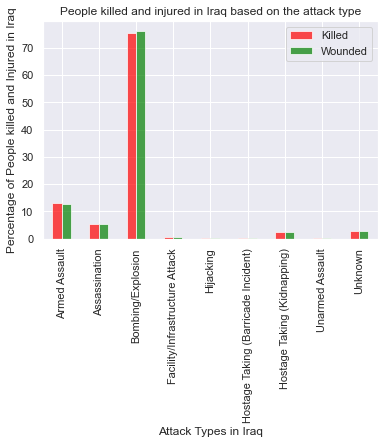

<Figure size 432x288 with 0 Axes>

In [107]:
# Plot for the percentage of people killed and injured in Iraq based on the Attack Types 
colors = ('red','green')
g = iraq_casualties_df.plot(kind='bar', color=colors, alpha=0.7, align = 'center')
g.set_xticklabels(iraq_casualties_df['AttackType'], rotation=90)
g.set_ylabel("Percentage of People killed and Injured in Iraq")
g.set_xlabel("Attack Types in Iraq")
g.set_title("People killed and injured in Iraq based on the attack type")
plt.show()
fig =plt.figure()
#fig.savefig('1st.png')


# In this analysis of Iraq terrorist activity, we deduce that the most casualties have happened due to Attack-Type - Bombing/Explosion. In the course of 1970-2015, Iraq has been the red zone for Terrorist activity and has had most number of people injured and killed due to Bombs/Explosion

# We now go to analyse and display Top 40 worst Terror Attacks in countries in the course of 1970-2015 based on the number of casualties in that particular country

In [108]:
#we make a new column 'Casualties' which combines Killed and wounded data into one
terrorism_df['Wounded'] = terrorism_df['Wounded'].fillna(0).astype(int)
terrorism_df['Killed'] = terrorism_df['Killed'].fillna(0).astype(int)
terrorism_df['Casualties'] = terrorism_df['Killed'] + terrorism_df['Wounded']

In [109]:
terrorism_df1 = terrorism_df.sort_values(by='Casualties',ascending=False)[:40]

In [110]:
#We form a pivot table to visualize this data
heat=terrorism_df1.pivot_table(index='Country',columns='Year',values='Casualties')
heat.fillna(0,inplace=True)
heat

Year            1982   1984   1992    1994    1995    1996   1997    1998  \
Country                                                                     
Afghanistan      0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Chad             0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Ethiopia         0.0    0.0  500.0     0.0     0.0     0.0    0.0     0.0   
France           0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
India            0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Iran           760.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Iraq             0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Japan            0.0    0.0    0.0   507.0  3092.0     0.0    0.0     0.0   
Kenya            0.0    0.0    0.0     0.0     0.0     0.0    0.0  4224.0   
Nepal            0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Russia           0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Rwanda           0.0    0.0    0.0  1180.0     0.0     0.0  498.0     0.0   
Somalia          0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
South Sudan      0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Spain            0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Sri Lanka        0.0    0.0    0.0     0.0     0.0  1362.0    0.0     0.0   
Syria            0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   
Tajikistan       0.0    0.0  800.0     0.0     0.0     0.0    0.0     0.0   
United States    0.0  751.0    0.0     0.0   818.0     0.0    0.0     0.0   

Year             2001     2004   2005    2006        2007    2008   2009  \
Country                                                                    
Afghanistan       0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
Chad              0.0     0.00    0.0     0.0    0.000000  1161.0    0.0   
Ethiopia          0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
France            0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
India             0.0     0.00    0.0  1005.0    0.000000     0.0    0.0   
Iran              0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
Iraq              0.0     0.00  702.0     0.0  833.333333     0.0  654.0   
Japan             0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
Kenya             0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
Nepal             0.0   734.00    0.0     0.0    0.000000     0.0    0.0   
Russia            0.0  1071.00    0.0     0.0    0.000000     0.0    0.0   
Rwanda            0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
Somalia           0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
South Sudan       0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
Spain             0.0   497.75    0.0     0.0    0.000000     0.0    0.0   
Sri Lanka         0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
Syria             0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
Tajikistan        0.0     0.00    0.0     0.0    0.000000     0.0    0.0   
United States  9574.0     0.00    0.0     0.0    0.000000     0.0    0.0   

Year                  2014   2015        2016   2017  
Country                                               
Afghanistan       0.000000  536.0    0.000000  584.0  
Chad              0.000000    0.0    0.000000    0.0  
Ethiopia          0.000000    0.0    0.000000    0.0  
France            0.000000    0.0  520.000000    0.0  
India             0.000000    0.0    0.000000    0.0  
Iran              0.000000    0.0    0.000000    0.0  
Iraq           1064.333333    0.0  911.666667    0.0  
Japan             0.000000    0.0    0.000000    0.0  
Kenya             0.000000    0.0    0.000000    0.0  
Nepal             0.000000    0.0    0.000000    0.0  
Russia            0.000000    0.0    0.000000    0.0  
Rwanda            0.000000    0.0    0.000000    0.0  
Somalia        

# We use Plotly to create an interactive heatmap which shows the data from the above pivot table. 


In [111]:
#pip install plotly

In [112]:
#importing the libraries
import plotly
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

# This Heatmap can be visualized for each country and year individually as well by selecting that particular country in the required year. It will display country, year and casualties in that particular terrorist activity when hovered over the required area. It is an interactive heatmap which is formed using Plotly and can be displayed offline in this jupyter notebook as well by using init_notebook_mode() method from plotly

In [113]:
#Creating a function to pass values in the heatmap
def df_to_plotly(df):
    return {'z': heat.values.tolist(),
            'x': heat.columns.tolist(),
            'y': heat.index.tolist()}


colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmapgl(colorscale=colorscale)
#data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=go.Heatmap(df_to_plotly(heatmap)), layout=layout)
iplot(fig, filename='heatmap',show_link=False)

# We now analyse data based on succesful targeted terrorist activity. Not all terrorist attempts were succesful. Some suceeded while some failed. This analysis shows successful attacks based on targets such as government organizations, educational institutions, airport/ aircraft ,etc. We plot this data on a bar chart visualization

In [114]:
#Grouping data Target and their successes
target_df = terrorism_df.groupby('Target_type')['Success'].count().reset_index()
target_df

Target_type  Success
0                 Abortion Related      263
1              Airports & Aircraft     1343
2                         Business    20669
3          Educational Institution     4322
4             Food or Water Supply      317
5          Government (Diplomatic)     3573
6             Government (General)    21283
7              Journalists & Media     2948
8                         Maritime      351
9                         Military    27984
10                             NGO      970
11                           Other      137
12                          Police    24506
13     Private Citizens & Property    43511
14  Religious Figures/Institutions     4440
15               Telecommunication     1009
16    Terrorists/Non-State Militia     3039
17                        Tourists      440
18                  Transportation     6799
19                         Unknown     5898
20                       Utilities     6023
21         Violent Political Party     1866

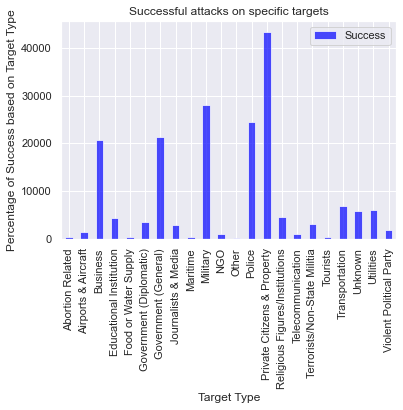

In [115]:
#Plot of successful events and target types
g = target_df.plot(kind='bar', color='blue', alpha=0.7, align = 'center')
g.set_xticklabels(target_df['Target_type'], rotation=90)
g.set_ylabel("Percentage of Success based on Target Type")
g.set_xlabel("Target Type")
g.set_title("Successful attacks on specific targets")
plt.show()

# In the above bar plot, we see that the major successful attacks happened at the private properties of the citizens followed by police departmenst and military base. This analysis helps us understand the targeted audience and the success of attacks on such audience.

# In this next analysis, we plot data - Weapons used in the numerous attacks. This helps in understanding the type of weapons that cause most attacks. We plot this on a pie chart to visualize

In [116]:
#Grouping data WeaponType and Attacks
weapon_df  = terrorism_df.groupby(['Weapon_type'])['Event_ID'].count().reset_index().sort_values('Event_ID', ascending = False)
weapon_df.columns = ['WeaponType','Attacks']
weapon_df.drop(weapon_df.index[[2,3]])

WeaponType  Attacks
2                                          Explosives    92426
4                                            Firearms    58524
6                                               Melee     3655
1                                            Chemical      321
9                                  Sabotage Equipment      141
11  Vehicle (not to include vehicle-borne explosiv...      136
7                                               Other      114
0                                          Biological       35
3                                        Fake Weapons       33
8                                        Radiological       14

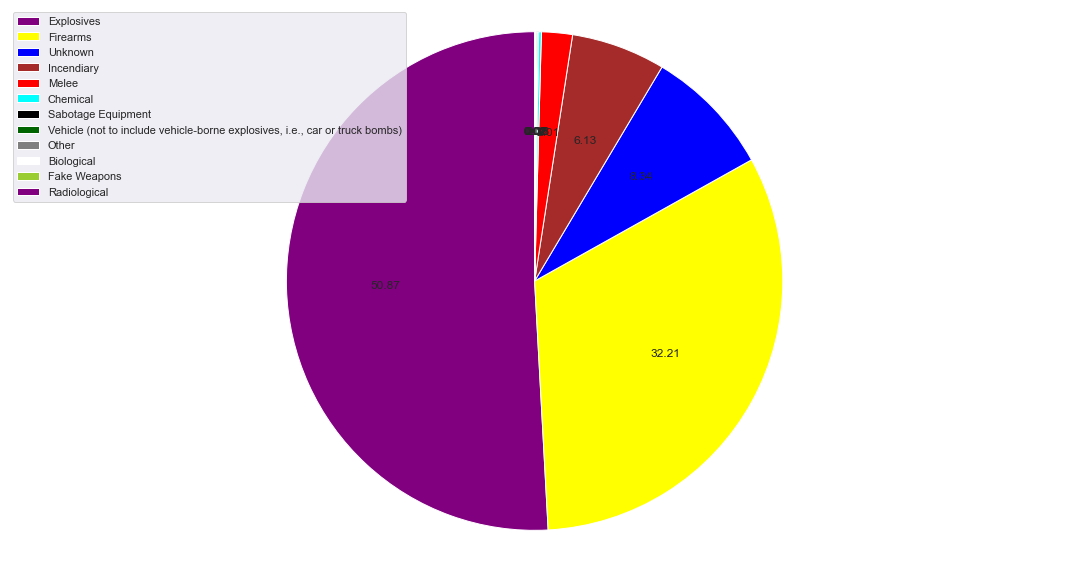

In [117]:
#creating a plot for the weapon types and the major number of weapons used
plt.figure(figsize=(15,8))
colors = ['purple', 'yellow', 'blue','brown','red','cyan', 'black', 'darkgreen','gray','white', 'yellowgreen']
patches, text, pct = plt.pie(weapon_df.Attacks, colors=colors, startangle=90, autopct = '%.2f')
plt.legend(patches, weapon_df.WeaponType, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

# From the above visualization, we see that 50 % of explosives/bombs are used for the terrorist attacks followed by 30% of firearms. By this, we can get information as to the usage and production of bombs which is more compared to any other weapon as it as they have the biggest share in terrorist activity.

# We now look at data corresponding to the top terrorist groups in the world and their attacks in different countires. We use folium to plot this data on a geo map which allows us to interact with the data and gather specific information by hovering over different countries

In [118]:
#Displaying Terrorist Groups v/s Count Data
terrorism_df.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [119]:
#pip install folium

In [120]:
import folium
from folium.plugins import MarkerCluster

In [121]:
#Display Country data
test = terrorism_df[terrorism_df.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [122]:
terrorism_df_group = terrorism_df.dropna(subset=['latitude','longitude'])

In [123]:
#Removing duplicates
terrorism_df_group = terrorism_df_group.drop_duplicates(subset=['Country','Group'])

In [124]:
#Taking top 8 terrorist groups
terrorist_groups = terrorism_df.Group.value_counts()[1:8].index.tolist()
terrorism_df_group = terrorism_df_group.loc[terrorism_df_group.Group.isin(terrorist_groups)]
terrorism_df_group.Group.unique()

array(["New People's Army (NPA)", 'Irish Republican Army (IRA)',
       'Shining Path (SL)',
       'Farabundo Marti National Liberation Front (FMLN)', 'Taliban',
       'Al-Shabaab', 'Islamic State of Iraq and the Levant (ISIL)'],
      dtype=object)

In [125]:
terrorgroup_map = folium.Map(location=[20, 0], tiles="Stamenterrain", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(terrorism_df_group)):
    marker=folium.Marker([terrorism_df_group.iloc[i]['latitude'],terrorism_df_group.iloc[i]['longitude']]) 
    popup='Group:{}<br>Country:{}'.format(terrorism_df_group.iloc[i]['Group'],
                                          terrorism_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(terrorgroup_map)
folium.TileLayer('openstreetmap').add_to(terrorgroup_map)
folium.TileLayer('Mapbox Bright').add_to(terrorgroup_map)
folium.TileLayer('cartodbdark_matter').add_to(terrorgroup_map)
folium.TileLayer('stamentoner').add_to(terrorgroup_map)
folium.LayerControl().add_to(terrorgroup_map)
#terrorgroup_map.save('Terrorist_Organizations_in_Country_cluster.html')
terrorgroup_map

# We conclude the analysis by plotting one last map which displays casualty intensity in each country. This shows the major impact of terrorism in the world. 

In [126]:
terrorism_df.dropna(subset=['latitude','longitude'],inplace=True)
location=terrorism_df[['latitude','longitude']][:5000]
country=terrorism_df['Country'][:5000]
killed_data=terrorism_df['Killed'][:5000]
wound_data=terrorism_df['Wounded'][:5000]
def color_point(x):
    if x>=30:
        color='green'
    elif ((x>0 and x<30)):
        color='blue'
    else:
        color='red'
    return color   
def point_size(x):
    if (x>30 and x<100):
        size=4
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size   
world_terror_visual = folium.Map(location=[30,0],tiles='CartoDB dark_matter',zoom_start=2)
for point in location.index:
    info='<b>Country: </b>'+str(country[point])+'<br><b>Killed </b>: '+str(killed_data[point])+'<br><b>Wounded</b> : '+str(wound_data[point])
    iframe = folium.IFrame(html=info, width=200, height=200)
    folium.CircleMarker(list(location.loc[point].values),popup=folium.Popup(iframe),radius=point_size(killed_data[point]),color=color_point(killed_data[point])).add_to(world_terror_visual)

# we colour coded the 'spots' with red being the most number of 'killed' data, blue being medium and green being comparatively least. 

In [127]:
world_terror_visual

# This exploratory data analysis has shown several factors and their relationship while impacting global terrorism. This can be used to keep track of these attacks and also analyse patterns and probability of attacks in the coming years. The weapons, targets and places that are often targeted can be anticipated and used to increase the security in those places.